In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("records_json.json") as f:
    data = json.load(f)
keys = sorted(list(data.keys()), key = lambda x : data[x]["time_stamp"])

cpuQuotaPercent = []
memoryMB = []
memoryUsageMB = []
batch_size = []
inference = []
durationMs = []
for key in keys:
    ele = data[key]
    cpuQuotaPercent.append(ele["cpuQuotaPercent"])
    memoryMB.append(ele["memoryMB"])
    memoryUsageMB.append(ele["memoryUsageMB"])
    batch_size.append(ele["batch_size"])
    inference.append(ele["inference"])
    durationMs.append(ele["durationMs"])

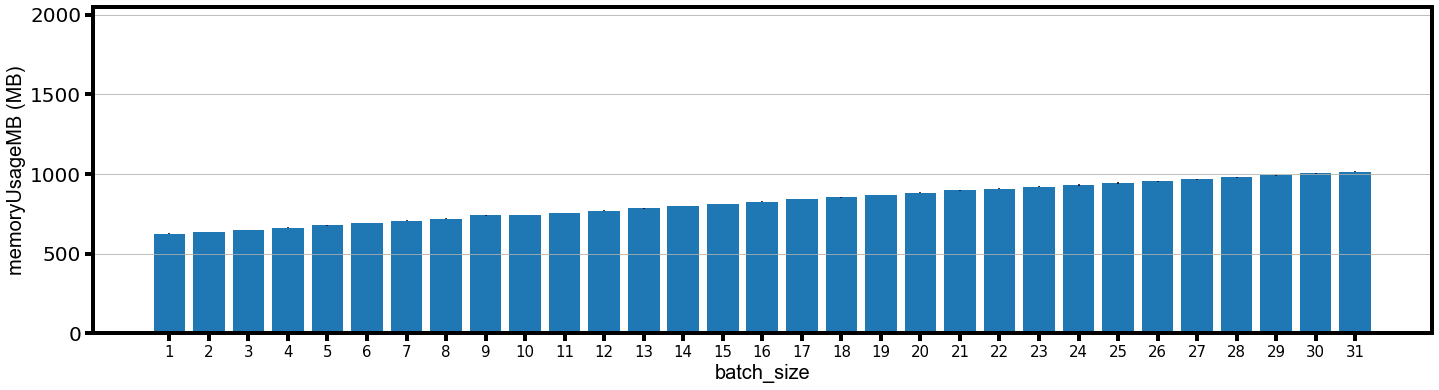

In [2]:
batch_mem = [[] for i in range(1, 32)]
n = len(keys)
for i in range(n):
    batch_mem[batch_size[i]-1].append(memoryUsageMB[i])
std_err = [np.std(i,ddof=1) for i in batch_mem]
mem_mean = [np.mean(i) for i in batch_mem]
labels = [str(i+1) for i in range(n)]
fig, ax = plt.subplots(1, 1, figsize=(24, 6))
bwith = 4
ax.spines['top'].set_linewidth(bwith)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)
ax.tick_params(width=4, length=8, labelsize=20)
ax.bar(np.arange(1, 32), mem_mean, yerr=std_err)
plt.grid(axis='y')
plt.xticks(np.arange(1, 32), np.arange(1, 32), fontsize=15)
plt.xlabel('batch_size', family = 'Arial', fontsize = 20)
plt.ylabel('memoryUsageMB (MB)', family = 'Arial', fontsize = 20)
plt.ylim(0, 2048)
plt.show()

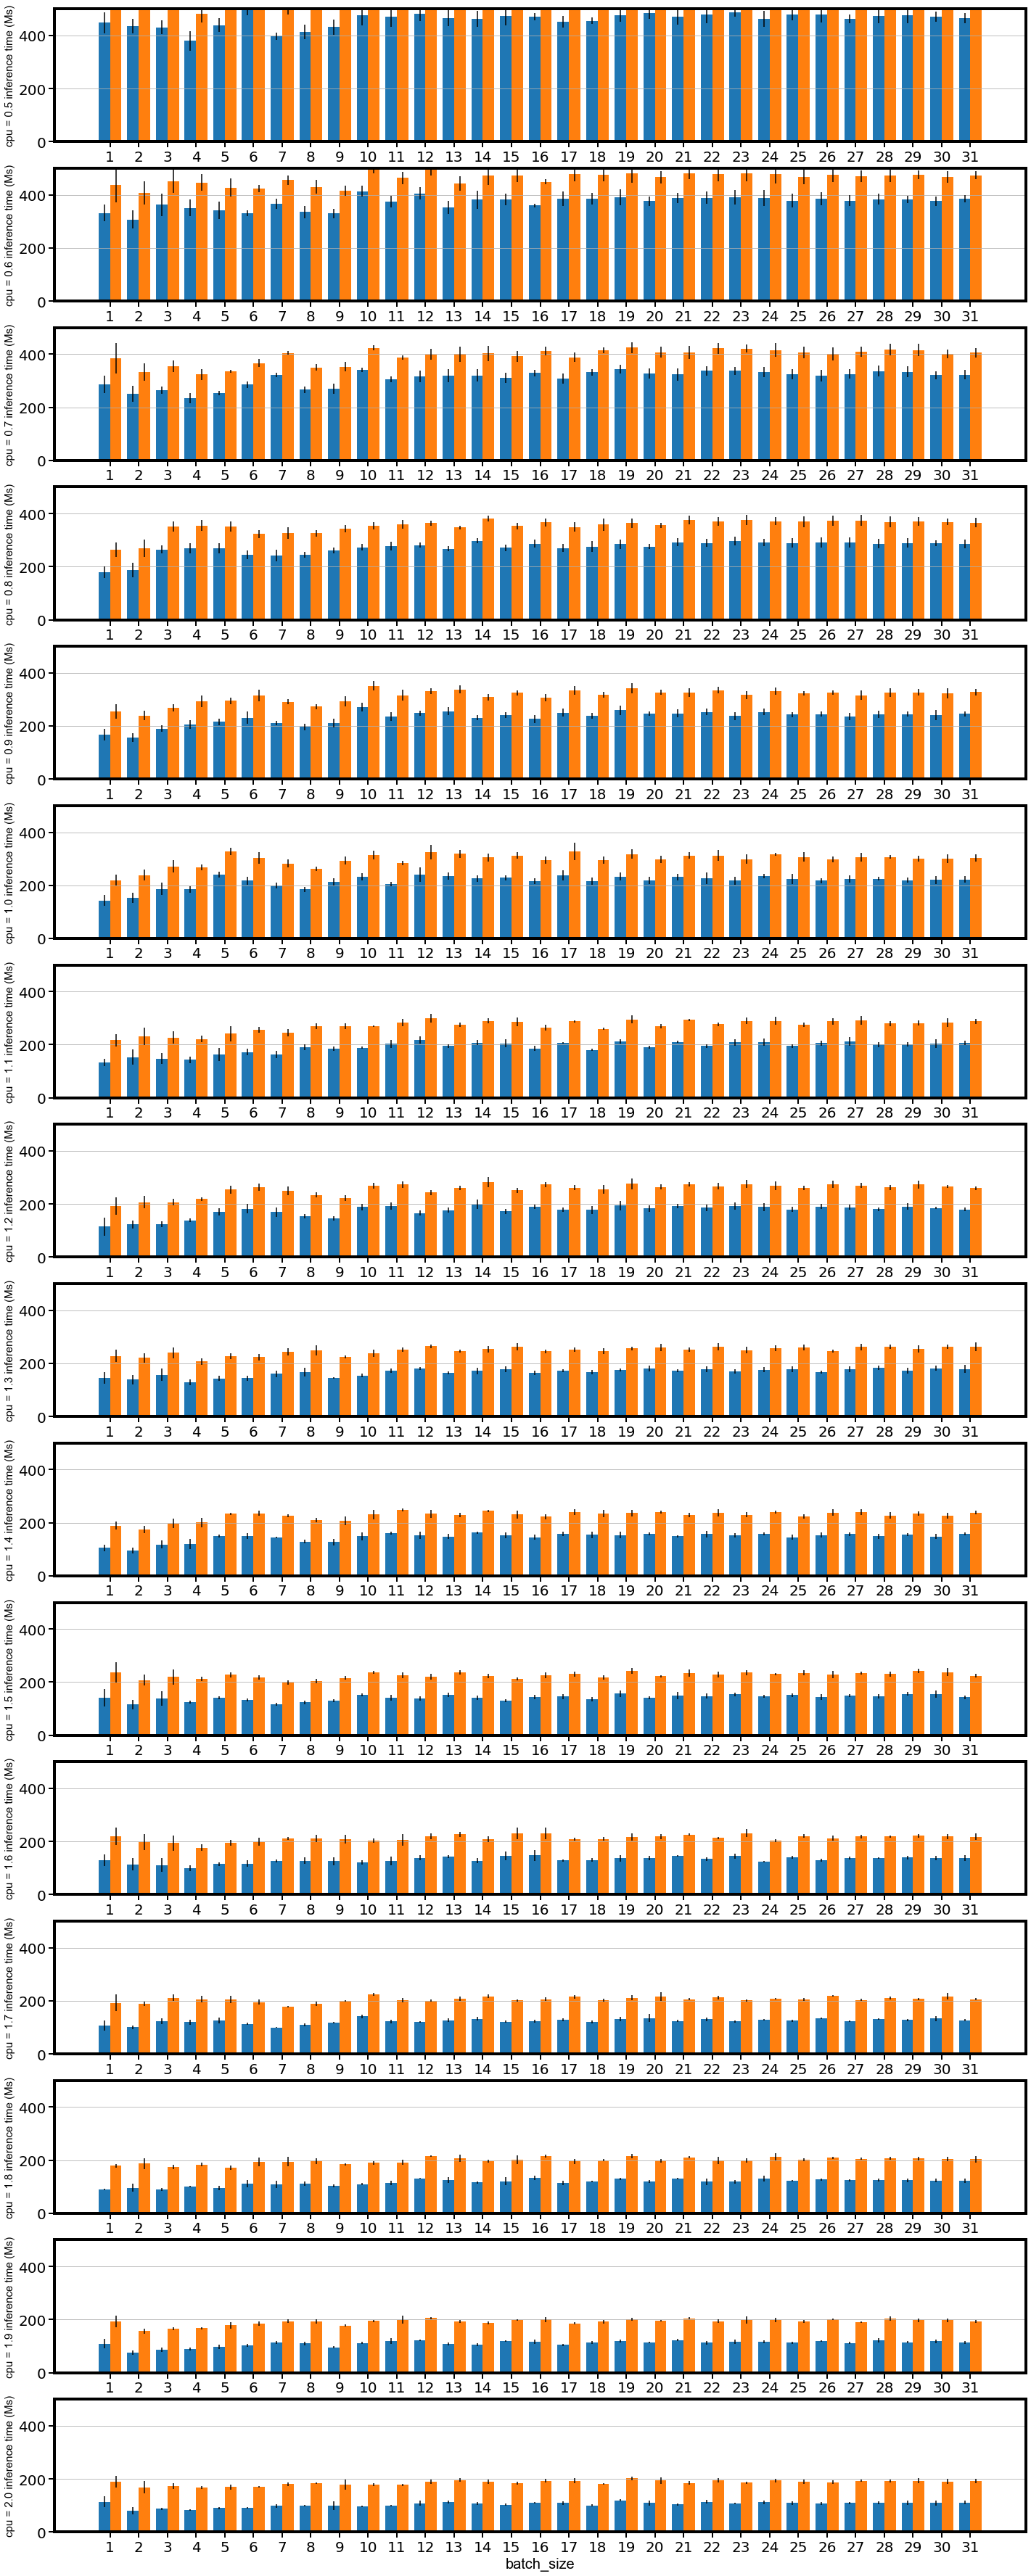

In [15]:
cpus = [0.5 + i / 10.0 for i in range(16)]
fig, axs = plt.subplots(len(cpus), 1, figsize=(24, 4*len(cpus)))
plt.setp(axs, xticks=np.arange(1, 32), xticklabels=np.arange(1, 32))

for index in range(len(cpus)):
    cpu = cpus[index]
    batch_inference = [[] for i in range(1, 32)]
    batch_durationMs = [[] for i in range(1, 32)]
    for i in range(n):
        if data[keys[i]]["isColdStart"] == False and int(cpuQuotaPercent[i]) == int(cpu * 100):
            batch_inference[batch_size[i]-1].append(inference[i])
            batch_durationMs[batch_size[i]-1].append(durationMs[i])

    for i in range(len(batch_inference)):
        for j in range(len(batch_inference[i])):
            batch_inference[i][j] /= i+1
            batch_durationMs[i][j] /= i+1
    
    std_err = [np.std(i,ddof=1) for i in batch_inference]
    inference_mean = [np.mean(i) for i in batch_inference]
    std_err_duration = [np.std(i,ddof=1) for i in batch_durationMs]
    durationMs_mean = [np.mean(i) for i in batch_durationMs]

    ax = axs[index]
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)      
    ax.spines['right'].set_linewidth(bwith)
    ax.tick_params(width=2, length=8, labelsize=20)
    x = np.arange(0.8, 31)
    ax.bar(x, inference_mean, yerr=std_err, width=0.4)
    x = np.arange(1.2, 32)
    ax.bar(x, durationMs_mean, yerr=std_err_duration, width=0.4)
    ax.grid(axis='y')
    ax.set_xlabel('batch_size', family = 'Arial', fontsize = 20)
    ax.set_ylabel('cpu = ' + str(cpu) + ' inference time (Ms)', family = 'Arial', fontsize = 15)
    ax.set_ylim([0, 500])

plt.show()

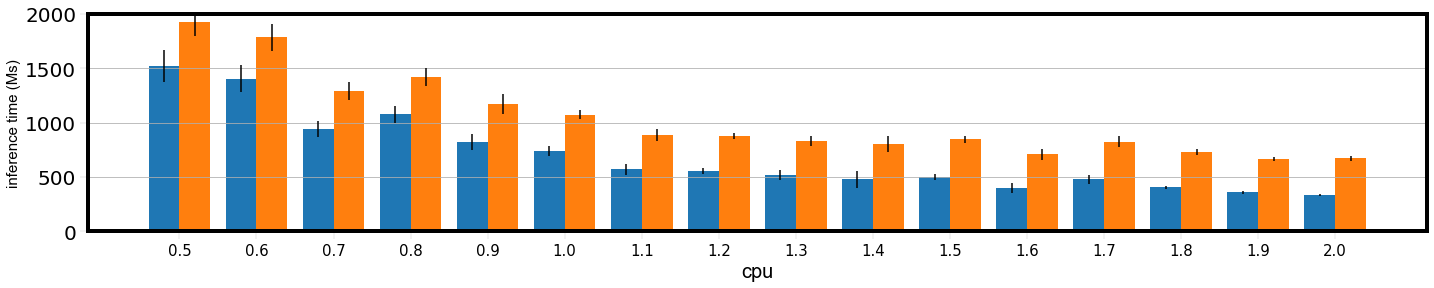

[[1782.0, 1487.0, 1474.0, 1414.0, 1447.0], [1408.0, 1313.0, 1604.0, 1291.0, 1397.0], [1010.0, 900.0, 947.0, 1007.0, 833.0], [1092.0, 1048.0, 1207.0, 1011.0, 1031.0], [750.0, 802.0, 937.0, 791.0, 832.0], [770.0, 802.0, 685.0, 709.0, 734.0], [661.0, 546.0, 572.0, 537.0, 543.0], [577.0, 507.0, 571.0, 546.0, 565.0], [500.0, 595.0, 498.0, 475.0, 522.0], [590.0, 494.0, 492.0, 416.0, 399.0], [472.0, 514.0, 524.0, 473.0, 516.0], [467.0, 383.0, 356.0, 368.0, 413.0], [487.0, 461.0, 483.0, 427.0, 534.0], [398.0, 397.0, 391.0, 428.0, 402.0], [368.0, 383.0, 339.0, 345.0, 350.0], [321.0, 327.0, 336.0, 345.0, 334.0]]


In [11]:

batch = 4
cpus = [0.5 + i / 10.0 for i in range(16)]
batch_inference = [[] for i in range(0, len(cpus))]
batch_durationMs = [[] for i in range(0, len(cpus))]
for index in range(len(cpus)):
    cpu = cpus[index]
    for i in range(n):
        if data[keys[i]]["isColdStart"] == False and int(cpuQuotaPercent[i]) == int(cpu * 100) and batch_size[i] == batch:
            batch_inference[index].append(inference[i])
            batch_durationMs[index].append(durationMs[i])
std_err = [np.std(i,ddof=1) for i in batch_inference]
inference_mean = [np.mean(i) for i in batch_inference]
std_err_duration = [np.std(i,ddof=1) for i in batch_durationMs]
durationMs_mean = [np.mean(i) for i in batch_durationMs]

fig, ax = plt.subplots(1, 1, figsize=(24, 4))
ax.spines['top'].set_linewidth(bwith)
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)      
ax.spines['right'].set_linewidth(bwith)
ax.tick_params(width=0.1, length=8, labelsize=20)
x = [i-0.02 for i in cpus]
ax.bar(x, inference_mean, yerr=std_err, width=0.04)
x = [i+0.02 for i in cpus]
ax.bar(x, durationMs_mean, yerr=std_err_duration, width=0.04)
ax.grid(axis='y')
ax.set_xlabel('cpu', family = 'Arial', fontsize = 20)
ax.set_ylabel('inference time (Ms)', family = 'Arial', fontsize = 15)
ax.set_ylim([0, 2000])
plt.xticks(cpus, cpus, fontsize=15)
plt.show()

print(batch_inference)